## Download PASCAL VOC Dataset

In [1]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_11-May-2012.tar

--2022-02-24 18:38:54--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G   242MB/s    in 7.8s    

2022-02-24 18:39:02 (244 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



Install easy-efficientdet package.

In [2]:
!pip install https://github.com/waldemarmeier/easy-efficientdet/archive/refs/tags/v0.1.0.zip

     / 125 kB 3.5 MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 462 kB 11.7 MB/s 
  Created wheel for easy-efficientdet: filename=easy_efficientdet-0.1.0-py3-none-any.whl size=119667 sha256=4f2aeb8cc2dd70e5f6dd727b046003aa6e0835e49eb726f17d8fed19eaeb632f
  Stored in directory: /tmp/pip-ephem-wheel-cache-5taqe6y8/wheels/0b/49/d4/7b4ba2f8f878feb76fe5c2af8df9329787102bba2f0418b825
Successfully built easy-efficientdet


## Prepare data
Convert images and annotations to tfrecords

In [3]:
!rm -rf ./data_train
!prepare_voc -i VOCdevkit/VOC2012/ -o ./data_train -s train

2022-02-24 18:39:44,321 - create-object-detection-dataset - INFO - using image list file: VOCdevkit/VOC2012/ImageSets/Main/train.txt
INFO:create-object-detection-dataset:using image list file: VOCdevkit/VOC2012/ImageSets/Main/train.txt
2022-02-24 18:39:48,404 - create-object-detection-dataset - INFO - Moved 5717 images and annotations from VOCdevkit/VOC2012/ to ./data_train
INFO:create-object-detection-dataset:Moved 5717 images and annotations from VOCdevkit/VOC2012/ to ./data_train


In [4]:
!rm -rf data_train_tfr
!mkdir data_train_tfr
!generate_tfrecord -im ./data_train -ia ./data_train -o ./data_train_tfr -s 6 -t voc

2022-02-24 18:39:54,123 - generate-tfrecord - INFO - creating labelmap
2022-02-24 18:39:55,305 - create-labelmap - INFO - found following objects: 
['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
2022-02-24 18:39:55,306 - create-labelmap - INFO - created labelmap file ./data_train_tfr/labelmap.json
2022-02-24 18:39:57,415 - generate-tfrecord - INFO - creating tfrecord: ./data_train_tfr/data-00001-00006.tfrecord
2022-02-24 18:40:01.057061: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-02-24 18:40:07,749 - generate-tfrecord - INFO - creating tfrecord: ./data_train_tfr/data-00002-00006.tfrecord
2022-02-24 18:40:14,266 - generate-tfrecord - INFO - creating tfrecord: ./data_train_tfr/data-00003-0000

In [5]:
!rm -rf ./data_val 
!prepare_voc -i VOCdevkit/VOC2012/ -o ./data_val -s val

2022-02-24 18:40:36,966 - create-object-detection-dataset - INFO - using image list file: VOCdevkit/VOC2012/ImageSets/Main/val.txt
INFO:create-object-detection-dataset:using image list file: VOCdevkit/VOC2012/ImageSets/Main/val.txt
2022-02-24 18:40:39,982 - create-object-detection-dataset - INFO - Moved 5823 images and annotations from VOCdevkit/VOC2012/ to ./data_val
INFO:create-object-detection-dataset:Moved 5823 images and annotations from VOCdevkit/VOC2012/ to ./data_val


In [6]:
!rm -rf data_val_tfr
!mkdir data_val_tfr
!generate_tfrecord -im ./data_val -ia ./data_val -o ./data_val_tfr -as -t voc

2022-02-24 18:40:44,453 - dataset-util - INFO - directory size: 680.695454MB
2022-02-24 18:40:44,454 - dataset-util - INFO - creating 6 shards
2022-02-24 18:40:44,454 - generate-tfrecord - INFO - creating labelmap
2022-02-24 18:40:45,084 - create-labelmap - INFO - found following objects: 
['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
2022-02-24 18:40:45,084 - create-labelmap - INFO - created labelmap file ./data_val_tfr/labelmap.json
2022-02-24 18:40:46,146 - generate-tfrecord - INFO - creating tfrecord: ./data_val_tfr/data-00001-00006.tfrecord
2022-02-24 18:40:46.843906: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-02-24 18:40:50,354 - generate-tfrecord - INFO - creating tfrecord: ./data_v

In [7]:
import tensorflow as tf
from easy_efficientdet import DefaultConfig, EfficientDet, EfficientDetFactory
from easy_efficientdet.evaluation import evaluate_od_pascal
from easy_efficientdet.utils import download_model

In [8]:
tf.__version__

'2.8.0'

In [9]:
path_weights = 'effdetd0_coco.h5'

In [10]:
download_model('https://github.com/waldemarmeier/easy-efficientdet/releases/download/v0.1.0/effdetd0_coco.h5',
                md5_hash='f1a5bf7df535ed2937f78abe428cbeb6',
                file_name=path_weights)

2022-02-24 18:41:10,904 - easy-efficientdet.utils - INFO - Saving model weights to ./effdetd0_coco.h5
16146432/16137056 [==============================] - 0s 0us/step


'./effdetd0_coco.h5'

In [11]:
config = DefaultConfig(num_cls=20, 
                       batch_size=16, 
                       warmup_epochs=1,
                       train_data_path='./data_train_tfr/', 
                       val_data_path='./data_val_tfr/', 
                       epochs=5,
                       path_weights=path_weights)

In [12]:
factory = EfficientDetFactory(config)

In [13]:
model = factory.build_model()

16719872/16705208 [==============================] - 1s 0us/step
2022-02-24 18:41:16,938 - easy-efficientdet - INFO - using backbone: efficientnetb0
2022-02-24 18:41:16,943 - easy-efficientdet - INFO - extracted following layers: block1a_project_bn/FusedBatchNormV3:0, block2b_add/add:0, block3b_add/add:0, block5c_add/add:0, block7a_project_bn/FusedBatchNormV3:0
2022-02-24 18:41:20,778 - easy-efficientdet - INFO - loading model weights from 'effdetd0_coco.h5' with by_name=True and skip_mismatch=True


In [14]:
data_train, data_val = factory.build_data_pipeline("train/val")

2022-02-24 18:41:21,394 - easy-efficientdet - INFO - Using 6 tfrecords
2022-02-24 18:41:21,397 - easy-efficientdet - INFO - Creating tf-dataset from following tfrecord-files: ./data_train_tfr/data-00006-00006.tfrecord, ./data_train_tfr/data-00002-00006.tfrecord, ./data_train_tfr/data-00001-00006.tfrecord, ./data_train_tfr/data-00005-00006.tfrecord, ./data_train_tfr/data-00003-00006.tfrecord, and 1 more file(s)
2022-02-24 18:41:22,889 - easy-efficientdet - INFO - Using 6 tfrecords
2022-02-24 18:41:22,890 - easy-efficientdet - INFO - Creating tf-dataset from following tfrecord-files: ./data_val_tfr/data-00006-00006.tfrecord, ./data_val_tfr/data-00002-00006.tfrecord, ./data_val_tfr/data-00001-00006.tfrecord, ./data_val_tfr/data-00005-00006.tfrecord, ./data_val_tfr/data-00003-00006.tfrecord, and 1 more file(s)
2022-02-24 18:41:26,312 - easy-efficientdet - INFO - 'train_data_size' property is updated to 5712'


In [15]:
opt = factory.create_optimizer()
loss = factory.create_loss_fn()

2022-02-24 18:41:26,329 - easy-efficientdet - INFO - Initializing WarmUpCosineDecayScheduler with following values: total_steps: 1785, warmup_steps: 1071, adjusted_lr: 0.02, warmup_learning_rate: 6.25e-05


In [16]:
model.compile(opt, loss)

Train model applying transfer learning. Five epochs for training are not enough - just for demonstration purposes. Feel free to increase the number of training epochs. Nevertheless, the resulting model is quiet ok.

In [17]:
model.fit(
    data_train,
    epochs=config.epochs,
    validation_data=data_val,
    verbose=1,
)

Epoch 1/5
357/357 [==============================] - 882s 2s/step - loss: 3.8818 - val_loss: 0.7867
Epoch 2/5
357/357 [==============================] - 788s 2s/step - loss: 0.6903 - val_loss: 0.7595
Epoch 3/5
357/357 [==============================] - 788s 2s/step - loss: 0.6181 - val_loss: 0.7450
Epoch 4/5
357/357 [==============================] - 835s 2s/step - loss: 0.5668 - val_loss: 0.5997
Epoch 5/5
357/357 [==============================] - 789s 2s/step - loss: 0.5404 - val_loss: 0.4983


In [18]:
inf_model = factory.build_inference_model(model, config.num_cls, config.image_shape, .5)

In [19]:
labelmap = factory.load_labelmap('./data_train_tfr/labelmap.json')

In [20]:
data_coco_eval = factory.build_data_eval()

2022-02-24 19:50:09,019 - easy-efficientdet - INFO - using default eval data path from config ./data_val_tfr/
2022-02-24 19:50:09,021 - easy-efficientdet - INFO - using default tfrecord_suffix from config tfrecord
2022-02-24 19:50:09,024 - easy-efficientdet - INFO - Using 6 tfrecords
2022-02-24 19:50:09,026 - easy-efficientdet - INFO - Creating tf-dataset from following tfrecord-files: ./data_val_tfr/data-00006-00006.tfrecord, ./data_val_tfr/data-00002-00006.tfrecord, ./data_val_tfr/data-00001-00006.tfrecord, ./data_val_tfr/data-00005-00006.tfrecord, ./data_val_tfr/data-00003-00006.tfrecord, and 1 more file(s)


In [21]:
evaluate_od_pascal(data_coco_eval, inf_model, config.image_shape, labelmap, is_data_parsed=True)

2022-02-24 19:54:24,072 - easy-efficientdet - INFO - currently at sample 250


INFO:easy-efficientdet:currently at sample 250


2022-02-24 19:55:46,167 - easy-efficientdet - INFO - currently at sample 500


INFO:easy-efficientdet:currently at sample 500


2022-02-24 19:57:07,845 - easy-efficientdet - INFO - currently at sample 750


INFO:easy-efficientdet:currently at sample 750


2022-02-24 19:58:29,573 - easy-efficientdet - INFO - currently at sample 1000


INFO:easy-efficientdet:currently at sample 1000


2022-02-24 19:59:51,356 - easy-efficientdet - INFO - currently at sample 1250


INFO:easy-efficientdet:currently at sample 1250


2022-02-24 20:01:12,876 - easy-efficientdet - INFO - currently at sample 1500


INFO:easy-efficientdet:currently at sample 1500


2022-02-24 20:02:34,593 - easy-efficientdet - INFO - currently at sample 1750


INFO:easy-efficientdet:currently at sample 1750


2022-02-24 20:03:56,007 - easy-efficientdet - INFO - currently at sample 2000


INFO:easy-efficientdet:currently at sample 2000


2022-02-24 20:05:17,793 - easy-efficientdet - INFO - currently at sample 2250


INFO:easy-efficientdet:currently at sample 2250


2022-02-24 20:06:39,466 - easy-efficientdet - INFO - currently at sample 2500


INFO:easy-efficientdet:currently at sample 2500


2022-02-24 20:08:01,123 - easy-efficientdet - INFO - currently at sample 2750


INFO:easy-efficientdet:currently at sample 2750


2022-02-24 20:09:22,678 - easy-efficientdet - INFO - currently at sample 3000


INFO:easy-efficientdet:currently at sample 3000


2022-02-24 20:10:44,562 - easy-efficientdet - INFO - currently at sample 3250


INFO:easy-efficientdet:currently at sample 3250


2022-02-24 20:12:06,098 - easy-efficientdet - INFO - currently at sample 3500


INFO:easy-efficientdet:currently at sample 3500


2022-02-24 20:13:27,559 - easy-efficientdet - INFO - currently at sample 3750


INFO:easy-efficientdet:currently at sample 3750


2022-02-24 20:14:49,068 - easy-efficientdet - INFO - currently at sample 4000


INFO:easy-efficientdet:currently at sample 4000


2022-02-24 20:16:10,616 - easy-efficientdet - INFO - currently at sample 4250


INFO:easy-efficientdet:currently at sample 4250


2022-02-24 20:17:31,845 - easy-efficientdet - INFO - currently at sample 4500


INFO:easy-efficientdet:currently at sample 4500


2022-02-24 20:18:52,975 - easy-efficientdet - INFO - currently at sample 4750


INFO:easy-efficientdet:currently at sample 4750


2022-02-24 20:20:14,647 - easy-efficientdet - INFO - currently at sample 5000


INFO:easy-efficientdet:currently at sample 5000


2022-02-24 20:21:36,164 - easy-efficientdet - INFO - currently at sample 5250


INFO:easy-efficientdet:currently at sample 5250


2022-02-24 20:22:57,085 - easy-efficientdet - INFO - currently at sample 5500


INFO:easy-efficientdet:currently at sample 5500


2022-02-24 20:24:18,907 - easy-efficientdet - INFO - currently at sample 5750


INFO:easy-efficientdet:currently at sample 5750


{'PascalBoxes_PerformanceByCategory/AP@0.5IOU/aeroplane': 0.7353111459385759,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/bicycle': 0.6160056026205868,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/bird': 0.6333728543147524,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/boat': 0.3999827157781348,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/bottle': 0.32684155495319456,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/bus': 0.7105124803631817,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/car': 0.5739704642971732,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/cat': 0.8353216535113173,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/chair': 0.35265442814717446,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/cow': 0.45903674323774774,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/diningtable': 0.4271996833522414,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/dog': 0.7403730162318514,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/horse': 0.74889741907775,
 'PascalBoxes_PerformanceByCategory/

## Visualize predictions

In [22]:
from easy_efficientdet.visualization import plot_image_bbox, run_inference_for_plot

In [23]:
sample = tuple(data_coco_eval.shuffle(512, 123).take(1))[0]
image = tf.image.resize(sample['image'], config.image_shape[:2])
bboxes = sample['bboxes']
bbox_cls = sample['bbox_cls']
gt_bbox_format = sample['bbbox_format'].numpy().decode()

In [24]:
pred_bboxes, pred_probs, pred_cls_ids = run_inference_for_plot(inf_model, image)

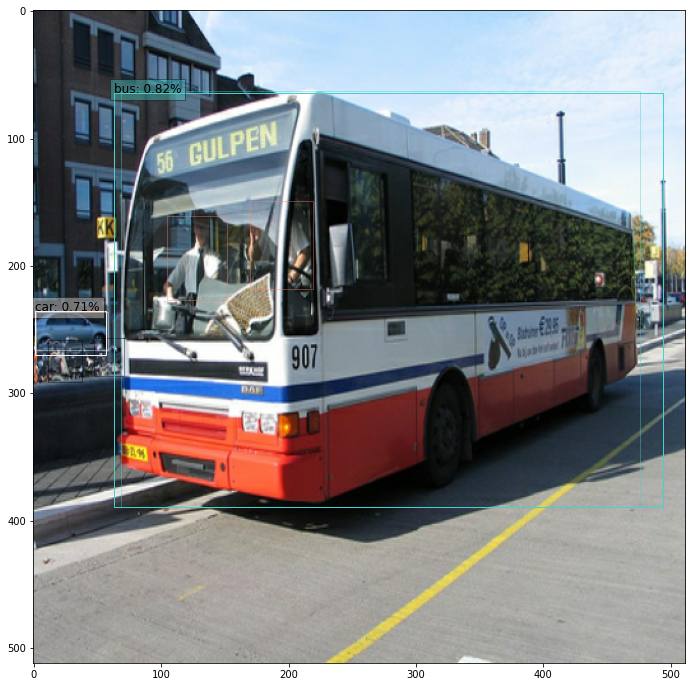

In [25]:
# light lines is ground truth
plot_image_bbox(image, 
                bboxes=bboxes, 
                bbox_cls_ids=bbox_cls,
                bbox_format=gt_bbox_format,
                pred_bboxes=pred_bboxes,
                pred_bbox_cls_ids=pred_cls_ids,
                pred_bboxes_probs=pred_probs,
                label_map=labelmap,
                pred_bbox_format='abs_corner_xy',
                figsize=(12, 12))

In [26]:
# might, change to 'int8', but optimzation takes several hours 
# and colab machine will probably run out of memory
opt_type = 'float32'
tflite_out_path = f'effdetd0_voc_{opt_type}.tflite'

tflite_model_blob = factory.quantize_model(model,
                       tflite_out_path,
                       opt_type=opt_type,
                       score_thresh=.5,
                       representative_dataset='val', # not necessary here
                       size_limit=2)

2022-02-24 20:33:54,865 - easy-efficientdet - INFO - Using image_shape (512, 512, 3) from config


INFO:easy-efficientdet:Using image_shape (512, 512, 3) from config


2022-02-24 20:33:54,952 - easy-efficientdet - INFO - starting quantization of type float32


INFO:easy-efficientdet:starting quantization of type float32


INFO:tensorflow:Assets written to: /tmp/opt_float32_3lfz8e70_20220224203354/assets


INFO:tensorflow:Assets written to: /tmp/opt_float32_3lfz8e70_20220224203354/assets


In [27]:
interpreter = tf.lite.Interpreter(tflite_out_path)
interpreter.allocate_tensors()
my_signature = interpreter.get_signature_runner()
output = my_signature(images=image[tf.newaxis, ...])

In [28]:
num_detections = output["output_0"][0].astype('int8')
pred_probs = output["output_1"][0, :num_detections]
pred_cls_ids = output["output_2"][0, :num_detections].astype('int8') + 1
pred_bboxes = output["output_3"][0, :num_detections, ...]

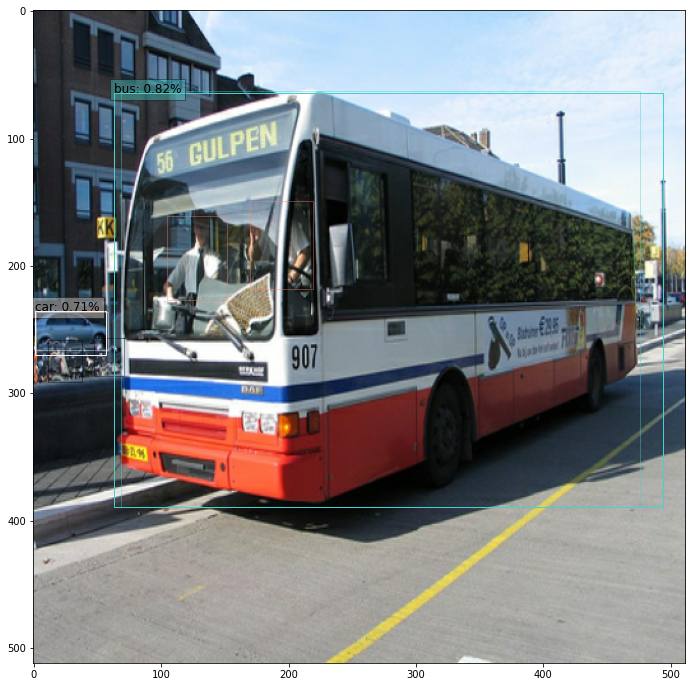

In [29]:
plot_image_bbox(image, 
                bboxes=bboxes, 
                bbox_cls_ids=bbox_cls,
                bbox_format=gt_bbox_format,
                pred_bboxes=pred_bboxes,
                pred_bbox_cls_ids=pred_cls_ids,
                pred_bboxes_probs=pred_probs,
                label_map=labelmap,
                pred_bbox_format='rel_corner_xy',
                figsize=(12, 12))